In [309]:
import matplotlib.pyplot as plt
import numpy as np
import random
from pandas import DataFrame
from sklearn.metrics import classification_report

## Task – 1: Activation Functions 

The Nonlinear Activation Functions are the most used activation functions. Nonlinearity helps to makes the graph look curves. It makes it easy for the model to generalize or adapt with variety of data and to differentiate between the output.

Sigmoid activation function and its derivative

In [310]:
def sigmoid(x):
    sig = 1/(1+np.exp(-x))
    dsig = sig * (1-sig)
    return sig, dsig

The above sigmoid function have the mathematical formula for the sigmoid and formula for its derivative after the calculation the values of the sigmoid and its derivative has been returned.

In [311]:
xs = np.arange(-10,10,0.01)
#print(x)
sigmoid(xs)

(array([4.53978687e-05, 4.58541039e-05, 4.63149240e-05, ...,
        9.99953220e-01, 9.99953685e-01, 9.99954146e-01]),
 array([4.53958077e-05, 4.58520013e-05, 4.63127789e-05, ...,
        4.67781866e-05, 4.63127789e-05, 4.58520013e-05]))

The sigmoid activation function curve looks like a S-shape curve. The main reason we use Sigmoid function as the values would be existing between (0,1). Which would be helping with the models where we have to predict the probability as the output. Since probability of anything exists between the range 0 and 1.

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


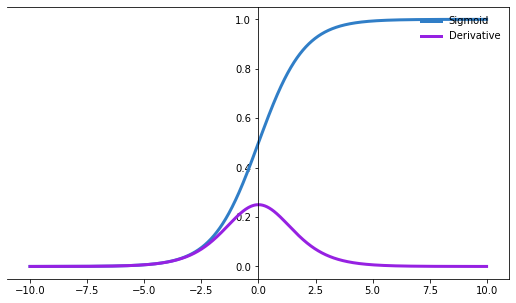

In [312]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.plot(xs,sigmoid(xs)[0],color="#307EC7", linewidth=3, label="Sigmoid")
ax.plot(xs,sigmoid(xs)[1],color="#9621E2", linewidth=3, label="Derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

The above plot shows for sigmoid activation function and its derivative

Tanh activation function and its derivative.

Tanh activation function is like an logistic sigmoid and performs better. The tanh function has a range from (-1,1) and the tanh also have a S-shaped curve. The main advantage between tanh and sigmoid is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in tanh graph. The tanh function will be mainly used for classification between two classes.

In [313]:
def tanh(x):
    t = (2/(1+np.exp(-2*x))) -1
    dt = 1- t**2
    return t,dt

The above tanh function have the mathematical formula for the sigmoid and formula for its derivative after the calculation the values of the tanh and its derivative has been returned.

In [314]:
xt= np.arange(-10,10,0.01)
tanh(xt)

(array([-1., -1., -1., ...,  1.,  1.,  1.]),
 array([8.24461455e-09, 8.41116665e-09, 8.58108362e-09, ...,
        8.75443273e-09, 8.58108340e-09, 8.41116687e-09]))

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


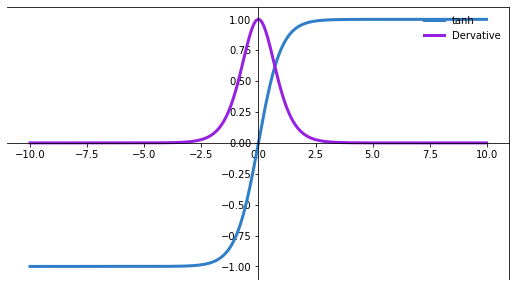

In [315]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.plot(xt,tanh(xt)[0], color="#307EC7", linewidth = 3, label="tanh")
ax.plot(xt,tanh(xt)[1], color="#9621E2", linewidth=3, label="Dervative")
ax.legend(loc="upper right", frameon = False)
fig.show()

The above plot shows for the tanh function and its derivative.

ReLU activation function and its derivative

ReLU is Rectified Linear Unit is a half rectified(from bottom). f(z) is zero when z is less than zero and f(z) is equal to z when is equal and above than zero. And for its derivative the range is from (0,1).

In [316]:
def relu(x):
    return np.maximum(0.0,x)

In [317]:
def drelu(x):
    return 0 if x <= 0.0 else 1

The above two function have the relu activation function and its derivative.

No handles with labels found to put in legend.
C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


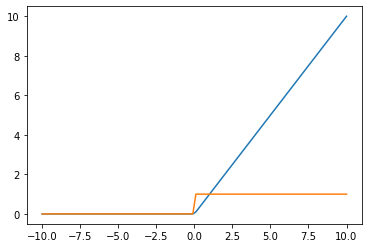

In [318]:
xr = np.linspace(-10,10,100)
# plt.spines['left'].set_position('center')
# plt.spines['bottom'].set_position('center')
plt.plot(xr,list(map(lambda xr: relu(xr),xr)))
plt.plot(xr,list(map(lambda xr: drelu(xr),xr)))
plt.legend(loc="upper right", frameon = False)
fig.show()
# ax.spines['bottom'].set_position('center')
# plt.plot(x, list(map(lambda x: relu(x),x)), label="relu")
# plt.plot(x, list(map(lambda x: drelu(x),x)), label="derivative")
# plt.title("ReLU")
# plt.legend()
# plt.show()

The above plot shows for the Relu and for its derivative

In [319]:
xa = np.arange(0,22)
def sigmoidarray(x):
    sig = 1/(1+np.exp(-x))
    return sig

In [320]:
sigmoidarray(xa)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        ])

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


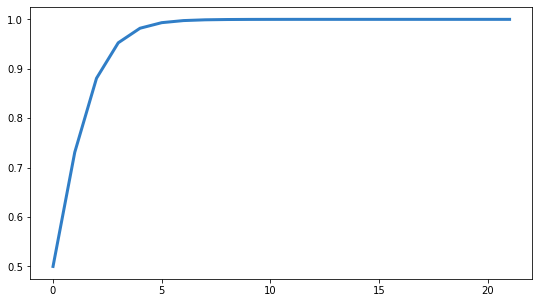

In [321]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(xa,sigmoidarray(xa),color="#307EC7", linewidth=3)
fig.show()

From the above plot we can see that the the scores have reached nearly 1.

In [322]:
def softmax(x):
    z = np.exp(x)
    return z

In [323]:
def softmax(z):
    e = np.exp(z-np.max(z))
#     s = np.sum(e, axis=1, keepdims=True)
    return e/e.sum(axis=0)

In [324]:
softmax(xa)

array([4.79309234e-10, 1.30289758e-09, 3.54164282e-09, 9.62718331e-09,
       2.61693975e-08, 7.11357976e-08, 1.93367146e-07, 5.25626399e-07,
       1.42880069e-06, 3.88388295e-06, 1.05574884e-05, 2.86982290e-05,
       7.80098743e-05, 2.12052824e-04, 5.76419338e-04, 1.56687021e-03,
       4.25919482e-03, 1.15776919e-02, 3.14714295e-02, 8.55482149e-02,
       2.32544158e-01, 6.32120559e-01])

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


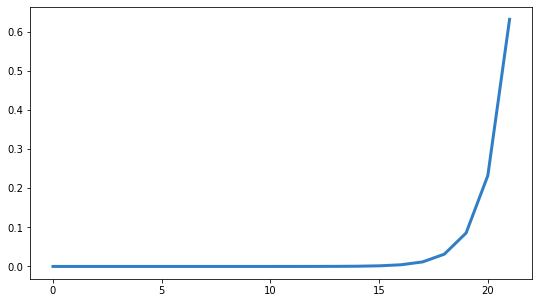

In [325]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(xa,softmax(xa),color="#307EC7", linewidth=3)
fig.show()

The above plot shows for the softmax function. It describes the higher the input value the higher the probability.

Differences between Sigmoid and Softmax: For the softmax function the sum of the probabilities will be equal to 1 but not in case for the sigmoid. For the softmax the probability will be less for the least input and more for higher input always.

The sigmoid function used for the binary classification in the logistic regression while the softmax will be used for the multi classification in the logistic regression.

Task – 2: Implementing XOR 

In [326]:
# myoutput = []
def Net(
    inputs,
    expected_output,
    inputLayerNeurons,
    hiddenLayerNeurons,
    outputLayerNeurons,
    epochs,
    lr,
):
    inputs
    expected_output
    inputLayerNeurons
    hiddenLayerNeurons
    print(inputLayerNeurons, hiddenLayerNeurons)
    # Random weights and bias initialization
    hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
    hidden_bias = np.random.uniform(size=(1, hiddenLayerNeurons))
    output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))
    output_bias = np.random.uniform(size=(1, outputLayerNeurons))

    print("Initializing Network Parameters:")
    print()
    print("Initial hidden weights: ", end="")
    print(*hidden_weights)
    print("Initial hidden biases: ", end="")
    print(*hidden_bias)
    print("Initial output weights: ", end="")
    print(*output_weights)
    print("Initial output biases: ", end="")
    print(*output_bias)

    # Training algorithm
    for _ in range(epochs):
        # Forward Propagation
        hidden_layer_activation = np.dot(inputs, hidden_weights)
        hidden_layer_activation += hidden_bias
        hidden_layer_output = sigmoidxor(hidden_layer_activation)

        output_layer_activation = np.dot(hidden_layer_output, output_weights)
        output_layer_activation += output_bias
        predicted_output = sigmoidxor(output_layer_activation)

        # Backpropagation
        error = expected_output - predicted_output
        d_predicted_output = error * dsigmoidxor(predicted_output)

        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * dsigmoidxor(hidden_layer_output)

        # Updating Weights and Biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
        hidden_weights += inputs.T.dot(d_hidden_layer) * lr
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr
    
    print("Output:", predicted_output)
    global myoutput
    new = []
    for item in predicted_output:
        if (item < 0.5).any():
            item = 0
        else:
            item = 1
        new.append(item)
    myoutput = new
    print ("Predicted:", myoutput) 
    global exp
    exp = expected_output
#     matrix = classification_report(inputs, myoutput)

    return hidden_weights, hidden_bias, output_weights, output_bias,myoutput,exp


In [327]:
def sigmoidxor(x):
    sig = 1/(1+np.exp(-x))
    return sig

In [328]:
def dsigmoidxor(x):
    dsig = (1/(1+np.exp(-x))) * (1 - 1/(1+np.exp(-x)))
    return dsig

[]

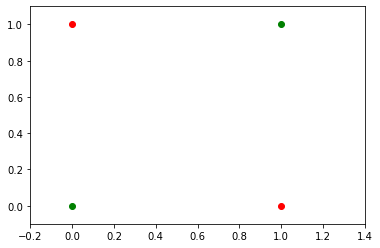

In [329]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="g")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()

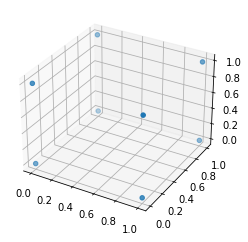

In [330]:
xyz=np.array([[1,1,1],[1,1,0],[1,0,1],[1,0,0],[0,1,1],[0,1,0],[0,0,1],[0,0,0]])
x=xyz[:,0]
y=xyz[:,1]
z=xyz[:,2]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z)
plt.show()

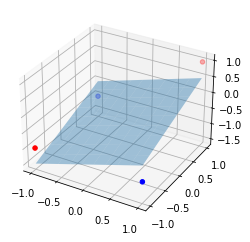

In [331]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# original data
# not linearly separable in 2D
x = np.array([[1, 1], [-1, -1], [-1, 1], [1, -1]])
y = np.array([-1, -1, 1, 1])

# feature mapping to produce x3 = x1 | x2
# add feature x3            | x3 computed here |
x = np.hstack([x, np.array([x[:, 0] | x[:, 1]]).T])
plus = x[y == 1]
minus = x[y == -1]
ax.scatter(plus[:, 0], plus[:, 1], plus[:, 2], c='b')
ax.scatter(minus[:, 0], minus[:, 1], minus[:, 2], c='r')

# these control the position and norm of the plane
point  = np.array([0, 0, 0.5])
normal = np.array([-1, -1, 2])

# this is copy paste for plotting a plane
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)
xx, yy = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy + d) * 1. /normal[2]
# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.4)
plt.show()

Sigmoid function and its derivative

In [332]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

Creating and x,y of values for the testing with 2 inputs and 1 output

For the above inputs passing for the Net function I chose to have 2 input layers as the x parameter has the two inputs and 2 hidden layers and 1 output layer has the y has one output. And I choose to have 1000000 epochs and 0.1 learning rate.

In [333]:
Net(x,y,2,2,1,1000000,0.1)

2 2
Initializing Network Parameters:

Initial hidden weights: [0.64392049 0.40156831] [0.81800355 0.23961655]
Initial hidden biases: [0.93353391 0.13981229]
Initial output weights: [0.39147907] [0.28469689]
Initial output biases: [0.20347034]
Output: [[0.00324003]
 [0.99593833]
 [0.99593834]
 [0.00320176]]
Predicted: [0, 1, 1, 0]


(array([[ -5.07654402, -76.09052604],
        [ -5.07449545, -76.09046056]]),
 array([[-1.22811514, 76.21986044]]),
 array([[-94.62368571],
        [ 21.44419129]]),
 array([[-5.7397686]]),
 [0, 1, 1, 0],
 array([[0],
        [1],
        [1],
        [0]]))

In [334]:
print("The complete output for xor for 2 inputs:", myoutput)

The complete output for xor for 2 inputs: [0, 1, 1, 0]


In [335]:
exp,myoutput

(array([[0],
        [1],
        [1],
        [0]]),
 [0, 1, 1, 0])

In [166]:
abc = np.array(myoutput)

In [167]:
abc= np.reshape(abc, (4,1))

In [168]:
exp == abc

array([[ True],
       [ True],
       [ True],
       [ True]])

For the 2 input, I have reshaped myoutput variable to match with the expected output variable and tried to match with each other and find the accuracy, From the above out I can say that it has correctly classified everything correctly.

Trying different tunings

In [169]:
Net(x,y,2,2,1,10000,1)

2 2
Initializing Network Parameters:

Initial hidden weights: [0.2927003  0.04681926] [0.50723223 0.91259422]
Initial hidden biases: [0.37682994 0.34535164]
Initial output weights: [0.83715945] [0.09959942]
Initial output biases: [0.87525606]
Output: [[0.52988134]
 [0.52166045]
 [0.79068126]
 [0.54504359]]
Predicted: [1, 1, 1, 1]


(array([[ 0.17393247, -0.1799558 ],
        [ 6.51215556,  6.53003846]]),
 array([[-2.12653419, -1.53081033]]),
 array([[ 13.72192415],
        [-13.77857683]]),
 array([[-0.011276]]),
 [1, 1, 1, 1],
 array([[0],
        [1],
        [1],
        [0]]))

I tried to put 10000 epochs and 1 has my learning rate and I can clearly see from the output that my Net function failed to classify the output correctly

For the main XOR values

##### For the orginal XOR values

In [336]:
xor = np.array([[1,1,1],[1,1,0],[1,0,1],[1,0,0],[0,1,1],[0,1,0],[0,0,1],[0,0,0]])
yor = np.array([[1],[0],[0],[1],[0],[1],[1],[0]])

For the above inputs passing for the Net function I chose to have 3 input layers as the x parameter has the two inputs and 3 hidden layers and 1 output layer has the y has one output. And I choose to have 100000 epochs and 0.1 learning rate.

In [337]:
Net(xor,yor,3,3,1,100000,0.1)

3 3
Initializing Network Parameters:

Initial hidden weights: [0.7786444  0.24060243 0.20154145] [0.40662695 0.55139379 0.7826716 ] [0.50782507 0.340235   0.39628298]
Initial hidden biases: [0.8586911  0.19115912 0.3747407 ]
Initial output weights: [0.44948419] [0.93031901] [0.55983907]
Initial output biases: [0.28178492]
Output: [[3.80587954e-01]
 [3.02235115e-01]
 [3.02234038e-01]
 [9.99992253e-01]
 [7.16553210e-01]
 [6.53027430e-01]
 [6.53028859e-01]
 [4.80700723e-04]]
Predicted: [0, 0, 0, 1, 1, 1, 1, 0]


(array([[41.43169853, -0.77997389, -7.41648245],
        [14.49222515,  0.17801469, 19.61438206],
        [19.83499856,  0.17794761, 17.07997404]]),
 array([[-3.15453579,  0.57277122,  1.79203251]]),
 array([[ 10.23338509],
        [  7.87148289],
        [-13.0005018 ]]),
 array([[-1.94787886]]),
 [0, 0, 0, 1, 1, 1, 1, 0],
 array([[1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0]]))

In [338]:
abc2 = np.array(myoutput)

In [339]:
abc2= np.reshape(abc2, (8,1))

In [340]:
a = exp == abc2
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{False: 2, True: 6}

For the original XOR gate, out of 8 I have got 6 correct results

In [175]:
Net(xor,yor,3,3,1,100000,1)

3 3
Initializing Network Parameters:

Initial hidden weights: [0.45251436 0.58325087 0.08909972] [0.39066095 0.42271483 0.01198095] [0.30550053 0.2153768  0.36813351]
Initial hidden biases: [0.62001904 0.01639985 0.17690336]
Initial output weights: [0.51450289] [0.31270519] [0.22741978]
Initial output biases: [0.12275449]
Output: [[3.69338946e-01]
 [6.07030816e-01]
 [6.07030825e-01]
 [8.48613080e-01]
 [6.07030798e-01]
 [8.48613083e-01]
 [8.48613123e-01]
 [1.07935754e-04]]
Predicted: [0, 1, 1, 1, 1, 1, 1, 0]


(array([[ 1.13138558e+03,  9.85858573e-01, -2.00573057e-01],
        [ 1.13141764e+03,  9.85857911e-01, -2.80546452e-01],
        [ 1.13129936e+03,  9.85860297e-01,  7.12398139e-03]]),
 array([[-284.15106899,   -0.70891592,   -5.55599751]]),
 array([[ 1.19254028e+01],
        [-6.45049731e+00],
        [ 3.75255828e-03]]),
 array([[-7.53449606]]),
 [0, 1, 1, 1, 1, 1, 1, 0],
 array([[1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0]]))

For the tuning I have tried to give 100000 epochs and 1 has the learning rate and I can see that the machine has learn to much and giving the values in the exponential but because of my if loop in the function I am able to round the values and if I compare them it the expected output i can see that the every thing has been correctly classified.

##### For the values given in the lab manual

In [176]:
xorgiven = np.array([[1,1,1],[1,1,0],[1,0,1],[1,0,0],[0,1,1],[0,1,0],[0,0,1],[0,0,0]])
yorgiven = np.array([[0],[1],[1],[1],[1],[1],[1],[0]])

In [177]:
Net(xorgiven,yorgiven,3,3,1,100000,0.1)

3 3
Initializing Network Parameters:

Initial hidden weights: [0.33631411 0.18371474 0.80282622] [0.37474904 0.81106765 0.92754127] [0.13630476 0.21635222 0.9712945 ]
Initial hidden biases: [0.07345305 0.21596926 0.32532092]
Initial output weights: [0.99232637] [0.05006038] [0.14631712]
Initial output biases: [0.57266976]
Output: [[0.23385203]
 [0.8622307 ]
 [0.86223373]
 [0.99921372]
 [0.86223334]
 [0.99921415]
 [0.99921085]
 [0.11703326]]
Predicted: [0, 1, 1, 1, 1, 1, 1, 0]


(array([[ -0.9640794 , -34.18581783,  -6.80290192],
        [ -0.96402806, -34.18580074,  -6.89520676],
        [ -0.96445568, -34.18594568,  -6.33435152]]),
 array([[-2.06627886, 67.74250738, -2.09700869]]),
 array([[-48.41616992],
        [ 10.23475227],
        [-54.51805484]]),
 array([[-0.84914423]]),
 [0, 1, 1, 1, 1, 1, 1, 0],
 array([[0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0]]))

In [178]:
abc3 = np.array(myoutput)
abc3= np.reshape(abc3, (8,1))
a = exp == abc3
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{True: 8}

For the lab inputs given, I have given 3 input layer, 3 hidden layer and 1 output layer with 100000 epochs and 0.1 as the learning rate. And from the above accuracy we can see that the model has successfully classified everything correctly.

Complications I have faced for the above task is to find the accuracy. How ever as this is the small output it took easy for me to manually look and conclude at it.

Task – 3: Dataset Creation and classification

Blobs

In [179]:
from sklearn.datasets import make_blobs

In [180]:
X_b, y_b = make_blobs(n_samples=100, centers=3, n_features=2,cluster_std=1)

df_blobs= DataFrame(dict(x=X_b[:,0], y=X_b[:,1], label=y_b))

Importing the make blobs data set with 100 random simples with 3 centers and 2 features and the standard deviation as 1.

I have stored the first two index's of the values to the x and y variables denotes the x and y columns and the classes into the label column

In [181]:
df_blobs.head() #sample of the dataframe

,x,y,label
0,-8.469141,0.220159,0
1,-7.899327,-1.029077,0
2,-7.362407,-0.229224,0
3,2.599972,10.076520,1
4,9.045233,-9.041782,2


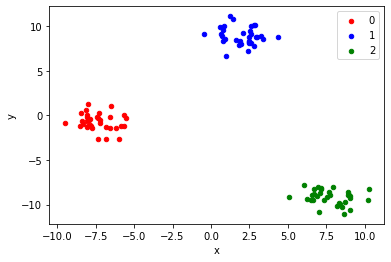

In [182]:
colors_blobs =  {0:"red", 1:"blue", 2:"green"}
fig, ax = plt.subplots()
grouped_blobs = df_blobs.groupby("label")
for key, group in grouped_blobs:
    group.plot(ax=ax, kind="scatter", x="x", y="y", label=key, color=colors_blobs[key])
plt.show()

In [183]:
def vectorizedi(j):
    v = np.zeros((100,3))
    count=0
    for i in j:
        value_1=i
        e = np.zeros((3))
        e[value_1] = 1.0
        v[count]=e
        count=count+1
    return v

In [184]:
a = y_b
y_b1 = np.resize(a, 100).reshape(100,1)
y_b2=vectorizedi(y_b1.astype(int))

In [185]:
y_b2

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1

From the above plot we can see that the points have been separated with each other with the respective centers

code

In [152]:
# def nsoftmax(z):
#     e = np.exp(z)
#     s = np.sum(e, axis=1, keepdims=True)
#     return e/s

In [151]:
# def ndsoftmax(z):
#     e = np.exp(z-np.max(z))
#     s = np.sum(e, axis=1, keepdims=True)
#     return e/s

In [780]:
# y_bb = np.reshape(y_b,100).reshape(100,1)

In [186]:
Net(X_b,y_b2,2,2,3,100000,2)

2 2
Initializing Network Parameters:

Initial hidden weights: [0.8298419  0.62936804] [0.71027449 0.95213719]
Initial hidden biases: [0.51492826 0.73130421]
Initial output weights: [0.74884159 0.05493617 0.05598063] [0.75874423 0.24018677 0.58297903]
Initial output biases: [0.22833903 0.0610101  0.13843317]


C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Output: [[9.99997136e-01 2.78945941e-06 2.29056318e-07]
 [9.99997136e-01 2.78945941e-06 2.29056318e-07]
 [9.99997136e-01 2.78945941e-06 2.29056318e-07]
 [1.05449694e-06 9.99994892e-01 9.38707322e-07]
 [3.89528024e-17 3.37696032e-06 9.99998511e-01]
 [3.89528024e-17 3.37696032e-06 9.99998511e-01]
 [1.05449694e-06 9.99994892e-01 9.38707322e-07]
 [3.89528024e-17 3.37696032e-06 9.99998511e-01]
 [1.05449694e-06 9.99994892e-01 9.38707322e-07]
 [3.89528024e-17 3.37696032e-06 9.99998511e-01]
 [1.05449694e-06 9.99994892e-01 9.38707322e-07]
 [3.89528024e-17 3.37696032e-06 9.99998511e-01]
 [9.99997136e-01 2.78945941e-06 2.29056318e-07]
 [9.99997136e-01 2.78945941e-06 2.29056318e-07]
 [9.99997136e-01 2.78945941e-06 2.29056318e-07]
 [9.99997136e-01 2.78945941e-06 2.29056318e-07]
 [1.05449694e-06 9.99994892e-01 9.38707322e-07]
 [1.05449694e-06 9.99994892e-01 9.38707322e-07]
 [1.05449694e-06 9.99994892e-01 9.38707322e-07]
 [3.89528024e-17 3.37696032e-06 9.99998511e-01]
 [9.99997136e-01 2.78945941e-06 

(array([[ 3606.94741942, -3192.16590147],
        [ 2537.19739482,  6489.0176469 ]]),
 array([[-386.15945442, -512.82314225]]),
 array([[-26.52570217,  24.97429706,   1.41053744],
        [ 24.02175616,  24.78316816, -27.29647629]]),
 array([[-11.25850753, -37.57283765,  12.00716821]]),
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 

In [187]:
abc4 = np.array(myoutput)
abc4= np.reshape(abc4, (100,1))
a = exp == abc4
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{False: 100, True: 200}

From the above we can see that see the accuracy of the classification

In [150]:
# Netsoftmax(X_b,y_bb,2,2,1,1000,0.1)

Make Moons

In [188]:
from sklearn.datasets import make_moons

In [189]:
X_m,y_m = make_moons(n_samples=100, noise=0.1)
df_moon = DataFrame(dict(x=X_m[:,0], y=X_m[:,1],label=y_m))

From the Make moons data set, I have taken 100 samples with noise 1 and stored them in x and y columns where the x and y columns talk about the points and the label column talk about the label class.

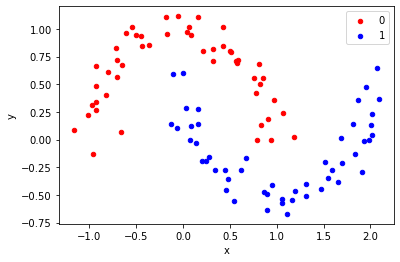

In [190]:
colors_moon = {0:"red", 1:"blue"}
fig,ax =plt.subplots()
grouped_moon = df_moon.groupby("label")
for key, group in grouped_moon:
    group.plot(ax=ax, kind="scatter", x="x",y="y",label=key,color=colors_moon[key])
plt.show()

From the above plot we can see that how the classes been separated with each other

In [191]:
df_moon

,x,y,label
0,0.563151,0.710940,0
1,-0.004589,0.600951,1
2,1.309448,-0.399160,1
3,0.139715,-0.031234,1
4,0.953089,-0.414341,1
...,...,...,...
95,-1.161773,0.086991,0
96,-0.108086,0.591415,1
97,1.165169,-0.541852,1
98,1.814754,0.136209,1


code

In [192]:
y_mm = np.reshape(y_m,100).reshape(100,1)

For the moon dataset I choose to have 2 input layers, 2 hidden layers and 1 output layer with 100000 epochs and 1 as my learning rate

In [193]:
Net(X_m,y_mm,2,2,1,100000,0.1)

2 2
Initializing Network Parameters:

Initial hidden weights: [0.1831377  0.62611237] [0.71516586 0.36087217]
Initial hidden biases: [0.79721941 0.53701505]
Initial output weights: [0.84718148] [0.65973688]
Initial output biases: [0.72935352]


C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Output: [[0.16020011]
 [0.16020011]
 [0.83976328]
 [0.83976328]
 [0.83976328]
 [0.16020011]
 [0.83976328]
 [0.83976328]
 [0.16020011]
 [0.16020011]
 [0.83976328]
 [0.16020011]
 [0.16020011]
 [0.83976328]
 [0.83976328]
 [0.16020011]
 [0.83976328]
 [0.83976328]
 [0.16020011]
 [0.83976328]
 [0.83976328]
 [0.16020011]
 [0.83976328]
 [0.16020011]
 [0.16020011]
 [0.83976328]
 [0.16020011]
 [0.16020011]
 [0.16020011]
 [0.16020011]
 [0.83976328]
 [0.83976328]
 [0.16020011]
 [0.83976328]
 [0.16020011]
 [0.16020011]
 [0.83976328]
 [0.83976328]
 [0.83976328]
 [0.83976328]
 [0.16020011]
 [0.16020011]
 [0.83976328]
 [0.16020011]
 [0.83976328]
 [0.83976328]
 [0.83976328]
 [0.83976328]
 [0.83976328]
 [0.83976328]
 [0.16020011]
 [0.83976328]
 [0.16020011]
 [0.83976328]
 [0.83976328]
 [0.16020011]
 [0.83976328]
 [0.16020011]
 [0.16020011]
 [0.16020011]
 [0.16020011]
 [0.83976328]
 [0.16020011]
 [0.16020011]
 [0.83976328]
 [0.16020011]
 [0.83976328]
 [0.16020011]
 [0.16020011]
 [0.16020011]
 [0.83976328

(array([[ -416.2352241 ,  4715.05561071],
        [  684.8128224 , -8203.53382114]]),
 array([[  1.88056219, -10.7916524 ]]),
 array([[-0.41787274],
        [ 2.89533382]]),
 array([[-1.23886616]]),
 [0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0],
 array([[0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
 

In [194]:
abc5 = np.array(myoutput)
abc5= np.reshape(abc5, (100,1))
a = exp == abc5
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{False: 16, True: 84}

From the above output we can see the accuracy of the model for the moons dataset

Make Circles

In [195]:
from sklearn.datasets import make_circles

For the circles I have taken 100 samples with 0.1 noise and stored the values in x and y. The x and y values have the points and the label has the classes for the dataset.

In [196]:
X_c, y_c = make_circles(n_samples=100, noise=0.1)
df_circles = DataFrame(dict(x=X_c[:,0], y=X_c[:,1], label=y_c))

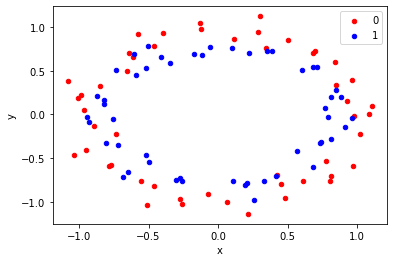

In [197]:
colors_circles = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped_circles = df_circles.groupby('label')
for key, group in grouped_circles:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors_circles[key])
plt.show()

code

In [198]:
y_cc = np.reshape(y_c,100).reshape(100,1)

I choosen to have 2 input layers, 2 hidden layers and 1 output layer with 100000 as my ephocs and 0.01 as my learning rate.

In [199]:
Net(X_c,y_cc,2,2,1,10000,0.2)

2 2
Initializing Network Parameters:

Initial hidden weights: [0.85900571 0.0943238 ] [0.74520479 0.74153256]
Initial hidden biases: [0.63145683 0.64069332]
Initial output weights: [0.30695289] [0.89861961]
Initial output biases: [0.4727463]
Output: [[0.46837594]
 [0.46858529]
 [0.47336042]
 [0.47584058]
 [0.47402703]
 [0.48383626]
 [0.47582119]
 [0.48074028]
 [0.47719171]
 [0.48167365]
 [0.48355718]
 [0.48240185]
 [0.47529172]
 [0.46666217]
 [0.48367483]
 [0.48099443]
 [0.46102998]
 [0.47423352]
 [0.46687961]
 [0.47493139]
 [0.47960047]
 [0.47330214]
 [0.47826721]
 [0.4849255 ]
 [0.47135725]
 [0.46096009]
 [0.48387728]
 [0.48124168]
 [0.4826792 ]
 [0.47289869]
 [0.46803226]
 [0.47444332]
 [0.46695047]
 [0.46685759]
 [0.47799162]
 [0.47401704]
 [0.47240227]
 [0.47310383]
 [0.47602274]
 [0.48101942]
 [0.47734625]
 [0.47883611]
 [0.4681644 ]
 [0.46998111]
 [0.47983618]
 [0.48383945]
 [0.46599301]
 [0.45682603]
 [0.47713275]
 [0.46133658]
 [0.47637856]
 [0.47798639]
 [0.47561978]
 [0.4662

(array([[-0.03657263,  0.12038066],
        [-0.50710391,  0.38716571]]),
 array([[-3.98215649, -3.65222028]]),
 array([[-8.69168539],
        [-6.53989645]]),
 array([[0.4382667]]),
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 array([[0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
    

In [200]:
abc6 = np.array(myoutput)
abc6= np.reshape(abc6, (100,1))
a = exp == abc6
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))
# (unique/counts)*100

{False: 50, True: 50}

I Have tried with the different inputs and this is the best input i had for my model with the best accuracy.

###### complications 

For the make blobs dataset as it has multilabel dataset I have not obtained the accurate results, as I considered my self.

###### different classification

For the 3 datasets above, I have tried to put different parameters and execute the net function by doing that I have obtained different results for each execution. I tried to show the best outputs which I have obtained.

Task – 4: Working with Mnist dataset

In [201]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

I have tried to import the mnist data file from the fetch_openml

In [202]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


The above keys are consider as the features or the keys for the mnist

In [203]:
X, y = mnist['data'], mnist['target']
print('Shape of X:', X.shape, '\n', 'Shape of y:', y.shape)

Shape of X: (70000, 784) 
 Shape of y: (70000,)


I Have taken the data column or key and stored in the X while the target into my y

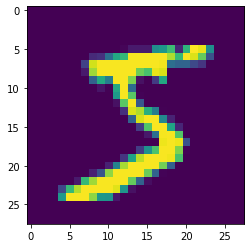

In [204]:
digit = X[0]
digit_pixels = digit.reshape(28, 28)
plt.imshow(digit_pixels)
# plt.axis('off')

I have tried to plot the image from the mnist by re-shaping it

In [205]:
y.shape

(70000,)

In [206]:
def vectorized(j):
    v = np.zeros((70000,10,1))
    count=0
    for i in j:
        value_1=i
        e = np.zeros((10,1))
        e[value_1] = 1.0
        v[count]=e
        count=count+1
    return v

The above vectorized function is used for converting the y values into a finite unit vector

In [207]:
y = y.astype('int')

I have converted my y data into integer format

In [208]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],vectorized(y[:60000]),y[60000:]

The above statement is to divide my datasets into training and testing. Where the X_train and y_train have the values from 0:60000 and also I have vectorized my y with the vectorized function. My X_test and y_test have the values from 60000: to the last.

I have reshaped my X_train and X_test with respective to (784,1)

In [209]:
X_train.shape

(60000, 784)

In [210]:
y_test.shape

(10000,)

In [211]:
Xtrain =X_train.reshape(60000,784,1)

In [212]:
X_test.shape

(10000, 784)

In [213]:
Xtest = X_test.reshape(10000,784,1)

In [214]:
Xtrain.shape

(60000, 784, 1)

In [215]:
y_train.shape

(70000, 10, 1)

In [216]:
y_test.shape

(10000,)

In [217]:
X_test[2]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  38., 254., 109.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

I have taken my iterables Xtrain,y_train & Xtest, y_test kept them in a ZIP which would be returning me as an iterator and converted that to a list again and stored respectively as my training and testing datas.

In [218]:
training = list(zip(Xtrain,y_train))

In [219]:
testing = list(zip(Xtest, y_test))

In [220]:
class Network(object):
    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoidxor(np.dot(w, a) + b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""

        if test_data:
            n_test = len(test_data)
        n = len(list(training_data))
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k : k + mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print(
                    "Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test)
                )
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [
            w - (eta / len(mini_batch)) * nw for w, nw in zip(self.weights, nabla_w)
        ]
        self.biases = [
            b - (eta / len(mini_batch)) * nb for b, nb in zip(self.biases, nabla_b)
        ]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x]  # list to store all the activations, layer by layer
        zs = []  # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoidxor(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * dsigmoidxor(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = dsigmoidxor(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives (partial C_x) / (partial a) for the output activations."""
        return output_activations - y

In [221]:
aisab= [np.random.randn(y,x) for x, y in zip(sizes[:-1], sizes[1:])]

NameError: name 'sizes' is not defined

In [815]:
len(aisab[0].reshape(30,784,1))

30

In [222]:
net = Network([784, 30, 10])

For the network class I am passing my 784 inputs and 30 hidden layers and 10 output layers

For the SGD I have tried with multiple epochs, Mini_batch and learning rates

In [223]:
net.SGD(training, 30, 100, 1.0, test_data=testing)

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 0: 3743 / 10000
Epoch 1: 4579 / 10000
Epoch 2: 5134 / 10000
Epoch 3: 5469 / 10000
Epoch 4: 5807 / 10000
Epoch 5: 6053 / 10000
Epoch 6: 6211 / 10000
Epoch 7: 6253 / 10000
Epoch 8: 5891 / 10000
Epoch 9: 6016 / 10000
Epoch 10: 6841 / 10000
Epoch 11: 6721 / 10000
Epoch 12: 7057 / 10000
Epoch 13: 7056 / 10000
Epoch 14: 7015 / 10000
Epoch 15: 7241 / 10000
Epoch 16: 7852 / 10000
Epoch 17: 7854 / 10000
Epoch 18: 7601 / 10000
Epoch 19: 7936 / 10000
Epoch 20: 8104 / 10000
Epoch 21: 8250 / 10000
Epoch 22: 8011 / 10000
Epoch 23: 8102 / 10000
Epoch 24: 7947 / 10000
Epoch 25: 8032 / 10000
Epoch 26: 8176 / 10000
Epoch 27: 8179 / 10000
Epoch 28: 8212 / 10000
Epoch 29: 8280 / 10000


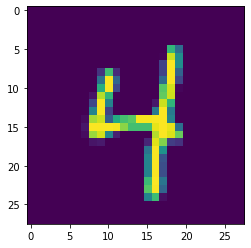

In [225]:
digit = Xtest[19]
digit_pixels = digit.reshape(28, 28)
plt.imshow(digit_pixels)

In [226]:
net.SGD(training, 30, 1000, 1.0, test_data=testing)

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 0: 8383 / 10000
Epoch 1: 8375 / 10000
Epoch 2: 8409 / 10000
Epoch 3: 8427 / 10000
Epoch 4: 8405 / 10000
Epoch 5: 8433 / 10000
Epoch 6: 8479 / 10000
Epoch 7: 8473 / 10000
Epoch 8: 8504 / 10000
Epoch 9: 8508 / 10000
Epoch 10: 8503 / 10000
Epoch 11: 8522 / 10000
Epoch 12: 8531 / 10000
Epoch 13: 8549 / 10000
Epoch 14: 8538 / 10000
Epoch 15: 8548 / 10000
Epoch 16: 8565 / 10000
Epoch 17: 8576 / 10000
Epoch 18: 8587 / 10000
Epoch 19: 8579 / 10000
Epoch 20: 8596 / 10000
Epoch 21: 8562 / 10000
Epoch 22: 8585 / 10000
Epoch 23: 8593 / 10000
Epoch 24: 8590 / 10000
Epoch 25: 8610 / 10000
Epoch 26: 8618 / 10000
Epoch 27: 8633 / 10000
Epoch 28: 8639 / 10000
Epoch 29: 8647 / 10000


In [228]:
anet=net.SGD(training, 35, 1000, 2.0, test_data=testing)

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 0: 8843 / 10000
Epoch 1: 8842 / 10000
Epoch 2: 8838 / 10000
Epoch 3: 8879 / 10000
Epoch 4: 8897 / 10000
Epoch 5: 8876 / 10000
Epoch 6: 8905 / 10000
Epoch 7: 8887 / 10000
Epoch 8: 8883 / 10000
Epoch 9: 8867 / 10000
Epoch 10: 8839 / 10000
Epoch 11: 8867 / 10000
Epoch 12: 8839 / 10000
Epoch 13: 8879 / 10000
Epoch 14: 8871 / 10000
Epoch 15: 8894 / 10000
Epoch 16: 8827 / 10000
Epoch 17: 8867 / 10000
Epoch 18: 8888 / 10000
Epoch 19: 8933 / 10000
Epoch 20: 8906 / 10000
Epoch 21: 8921 / 10000
Epoch 22: 8922 / 10000
Epoch 23: 8891 / 10000
Epoch 24: 8928 / 10000
Epoch 25: 8852 / 10000
Epoch 26: 8879 / 10000
Epoch 27: 8862 / 10000
Epoch 28: 8882 / 10000
Epoch 29: 8877 / 10000
Epoch 30: 8890 / 10000
Epoch 31: 8904 / 10000
Epoch 32: 8906 / 10000
Epoch 33: 8843 / 10000
Epoch 34: 8840 / 10000


In [300]:
abd= net.feedforward(Xtest[50])

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [301]:
def argmax(array):
  index, value = 0, array[0]
  for i,v in enumerate(array):
    if v > value:
      index, value = i,v
  return index

In [302]:
array = abd
result = argmax(array)
print (result)

value= array[result]
print ('maximum value %s : index %d' % (value,result))

6
maximum value [0.97655172] : index 6


The predicted number with the probability and we can see the number for the index as well to check the number

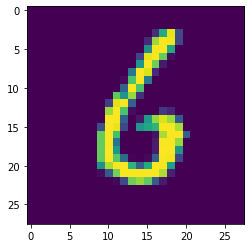

In [303]:
digit = Xtest[50]
digit_pixels = digit.reshape(28, 28)
plt.imshow(digit_pixels)

In [304]:
net = Network([784, 40, 10])

In [305]:
net.SGD(training, 35, 1000, 2.4, test_data=testing)

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 0: 2513 / 10000
Epoch 1: 3218 / 10000
Epoch 2: 3703 / 10000
Epoch 3: 4049 / 10000
Epoch 4: 4245 / 10000
Epoch 5: 4624 / 10000
Epoch 6: 4913 / 10000
Epoch 7: 5354 / 10000
Epoch 8: 5742 / 10000
Epoch 9: 6020 / 10000
Epoch 10: 6187 / 10000
Epoch 11: 6252 / 10000
Epoch 12: 6414 / 10000
Epoch 13: 6622 / 10000
Epoch 14: 7049 / 10000
Epoch 15: 7160 / 10000
Epoch 16: 7344 / 10000
Epoch 17: 7377 / 10000
Epoch 18: 7419 / 10000
Epoch 19: 7638 / 10000
Epoch 20: 7871 / 10000
Epoch 21: 7945 / 10000
Epoch 22: 8065 / 10000
Epoch 23: 8109 / 10000
Epoch 24: 8171 / 10000
Epoch 25: 8228 / 10000
Epoch 26: 8236 / 10000
Epoch 27: 8269 / 10000
Epoch 28: 8310 / 10000
Epoch 29: 8303 / 10000
Epoch 30: 8288 / 10000
Epoch 31: 8343 / 10000
Epoch 32: 8387 / 10000
Epoch 33: 8435 / 10000
Epoch 34: 8434 / 10000


I have tried with mutiple tunning and the best accuracy I have achived is 89%.